# **Email Spam Classification**

## **Read Data**

In [97]:
import pandas as pd

data = pd.read_csv("emails.csv")
data = data.dropna()

data.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


## **Split To Train/Test Sets**

In [98]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data.text, data.spam)

## **To Vectorizer**

In [99]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

vectorizer.fit(x_train)

training_vector = vectorizer.transform(x_train)
testing_vector = vectorizer.transform(x_test)


## **Scores' Dictionary**

In [100]:
from sklearn.metrics import confusion_matrix, accuracy_score

scores = {}

## **Naive Bayes**

In [101]:
from sklearn.naive_bayes import MultinomialNB

naive_bayes_classifier = MultinomialNB()

naive_bayes_classifier.fit(training_vector, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

### **Test**

In [102]:
results = naive_bayes_classifier.predict(testing_vector)

scores["Naive Bayes"] = accuracy_score(y_test, results)

confusion_matrix(y_test, results)

array([[1076,    8],
       [  10,  338]])

## **Logistic Regression**

In [103]:
from sklearn.linear_model.logistic import LogisticRegression

logistic_regression_classifier = LogisticRegression(max_iter=200)

logistic_regression_classifier.fit(training_vector, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### **Score**

In [104]:
results = logistic_regression_classifier.predict(testing_vector)

scores["Logistic Regression"] = accuracy_score(y_test, results)

confusion_matrix(y_test, results)

array([[1072,   12],
       [  12,  336]])

## **KNN**

In [105]:
from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier(n_neighbors=2)

knn_classifier.fit(training_vector, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

### **Score**

In [106]:
results = knn_classifier.predict(testing_vector)

scores["KNN"] = accuracy_score(y_test, results)

confusion_matrix(y_test, results)

array([[1072,   12],
       [ 127,  221]])

## **Support Vector Machine**

In [107]:
from sklearn import svm

svm_classifier = svm.SVC(kernel='linear')

svm_classifier.fit(training_vector, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

### **Score**

In [108]:
results = svm_classifier.predict(testing_vector)

scores["SVM"] = accuracy_score(y_test, results)

confusion_matrix(y_test, results)

array([[1070,   14],
       [  14,  334]])

## **Results**

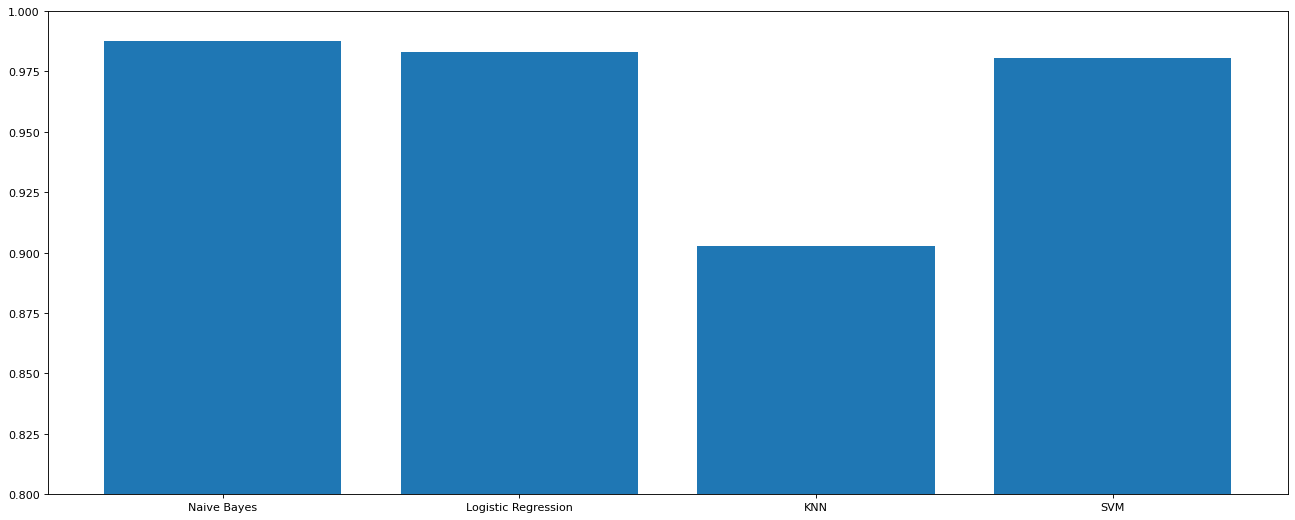

In [109]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(20, 8), dpi=80)
plt.ylim([0.8,1])
plt.bar(*zip(*scores.items()))
plt.show()

**Naive Bayes seems to give the best results**

## **Most Frequent Spam Words**

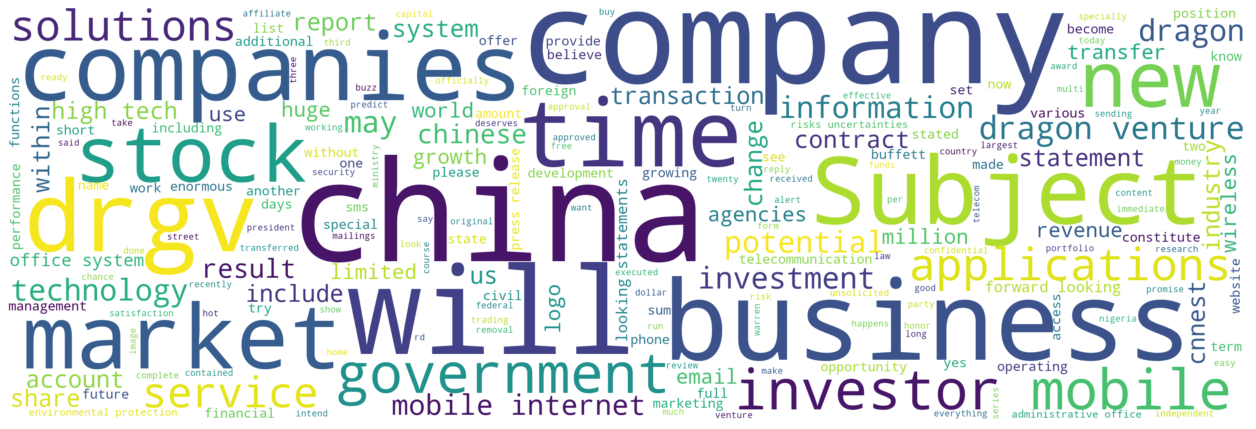

In [110]:
from wordcloud import WordCloud, STOPWORDS
spam_text = data[data.spam == 1].text.values
 
wordcloud = WordCloud(width=3000,height=1000, stopwords = STOPWORDS, background_color = "white", ).generate(str(spam_text))

figure(figsize=(20, 8), dpi=80)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off") 
plt.show()

## **Predict Function**

In [111]:
def predict_spam(text, classifier = naive_bayes_classifier):
  text_vector = vectorizer.transform([text])
  result = classifier.predict(text_vector)
  if(result == 1):
    print("Spam")
  else:
    print("Not Spam")

### **Examples**

In [112]:
predict_spam("Free Drugs for everyone who is interested")

Spam


In [113]:
predict_spam("Hey Johny, how are you? Let's go basketball this weekend")

Not Spam


In [114]:
predict_spam("Hey Johny, how are you? Give us your web banking password")

Spam


In [115]:
predict_spam("In case a virus is detected on your system, you could use some adblocker")

Not Spam


In [116]:
predict_spam("Virus detected on your system. Please click on the following link")

Spam


In [117]:
predict_spam("Hello students, I am sending you the assigment for tomorrow's course. Mr Jones")

Not Spam


In [118]:
predict_spam("Hello students,you were randomly picked to win money")

Spam


In [119]:
predict_spam("Free pills to improve your model's accuracy")

Spam
